# Note

* All airline, all price
* 2023-07-13 : initial: all airlines, remove outlier, LR, simplify isotonic
* 2023-07-30 : update graph format, simplified equation
* 2023-08-11 : update get_slope, get_intercept, get_linear_equation, equations
* 2023-08-12 : add y_hat for LR

# Setup

In [1]:
import os
import pandas as pd
from datetime import datetime, date
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

# get_slope

In [2]:
def get_slope(x1, y1, x2, y2):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b1 = ((y1-mean_y)*(x1-mean_x) + (y2-mean_y)*(x2-mean_x))/(math.pow(x1-mean_x,2) + math.pow(x2-mean_x,2))
    return b1

In [3]:
get_slope(2, 3, 6, 7)

1.0

# get_intercept

In [4]:
def get_intercept(x1, y1, x2, y2, b1):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b0 = mean_y - b1*mean_x
    return b0

In [5]:
get_intercept(2, 3, 6, 7, get_slope(2, 3, 6, 7))

1.0

# get_linear_equation

In [6]:
# b0 : intercept
# b1 : slope
# y = b0 + b1*x
def get_linear_equation(b0,b1):
    if b1 != 0 :
        if b1 > 0:
            print('y = %.2f' % b0, '+ %.2f' % b1, '*x' )
        else:
            print('y = %.2f' % b0, ' %.2f' % b1, '*x' )
    else : 
        print('y = %.2f' % b0 )

In [7]:
get_linear_equation(2.3333,4.567)

y = 2.33 + 4.57 *x


# Read CSV

In [8]:
folder = 'C:\\Users\\Pleng Weerada\\Documents\\MSc Project\\flight_data\\data_files_for_model\\'

In [9]:
# ref : https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
file_name = folder + 'ticket_price_HND_direct__2023-07-12_18-38-05.csv'
df = pd.read_csv(file_name)

In [10]:
df

route airline_nm  direct depart_dt col_pre_depart_dt   search_dt  \
0    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-01   
1    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-02   
2    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-03   
3    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-04   
4    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-05   
..          ...        ...     ...       ...               ...         ...   
874  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-03   
875  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-05   
876  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-06   
877  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-07   
878  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-08   

     col_days_bf_depart  ticket_price  price_on_depart_date  col_saving_rate  \
0                   -30         900.0                 912.0         1.315789   
1                   -29         900.0                 912.0         1.315789   
2                   -28         909.0                 912.0         0.328947   
3                   -27         909.0                 912.0         0.328947   
4                   -26         891.0                 912.0         2.302632   
..                  ...           ...                   ...              ...   
874                  -6         904.0                 911.0         0.768386   
875                  -4         893.0                 911.0         1.975851   
876                  -3         893.0                 911.0         1.975851   
877                  -2         893.0                 911.0         1.975851   
878                  -1         911.0                 911.0         0.000000   

    col_day_of_week  
0            Monday  
1            Monday  
2            Monday  
3            Monday  
4            Monday  
..              ...  
874         Tuesday  
875         Tuesday  
876         Tuesday  
877         Tuesday  
878         Tuesday  

[879 rows x 11 columns]

# Plot graph (Raw file)

In [11]:
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

# Remove Outlier

In [12]:
# taken from : https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
median = df['col_saving_rate'].quantile(0.5)
Q1 = df['col_saving_rate'].quantile(0.25)
Q3 = df['col_saving_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('median %.4f' % median)
print('Q1 {0:.4f},Q3 {1:.4f}, IQR {2:.4f}, upper {3:.4f},lower {4:.4f}'.format(Q1, Q3, IQR, upper, lower))
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['col_saving_rate']>=upper)[0]
lower_array = np.where(df['col_saving_rate']<=lower)[0]
 
# # Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
print("New Shape: ", df.shape)

median 1.3158
Q1 0.4408,Q3 1.9780, IQR 1.5372, upper 4.2839,lower -1.8651
New Shape:  (806, 11)


# Plot graph (af outlier removed)

Data after outliner removal


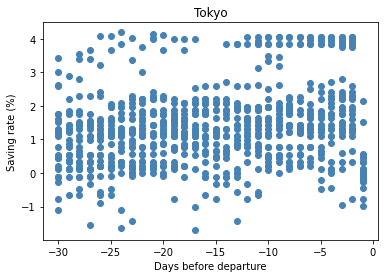

In [13]:
print('Data after outliner removal')
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

# 1) Linear Regression

In [14]:
import numpy as np

x = []
y = []
for index, row in df.iterrows():
    x.append([row['col_days_bf_depart']])
    y.append([row['col_saving_rate']])
    
len(x), len(y)

(806, 806)

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
lnr_clf = linear_model.LinearRegression()

# Train the model using the training sets
lnr_clf.fit(x, y)

# predit saving rate using train data
lnr_y_pred = lnr_clf.predict(x)

print("Linear regression" + "-"*30)
print("Coefficients: {0} \nIntercept: {1}".format(lnr_clf.coef_, lnr_clf.intercept_))
print("y_hat = %.2f" % lnr_clf.intercept_[0] , ' +  %.2f' % lnr_clf.coef_[0][0], 'x' )

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, lnr_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, lnr_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, lnr_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(x, lnr_y_pred, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Tokyo ")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

Linear regression------------------------------
Coefficients: [[0.0269848]] 
Intercept: [1.77271255]
y_hat = 1.77  +  0.03 x
Mean squared error: 1.31
Mean absolute error: 0.87
Coefficient of determination: 0.04


# 2) Isotonic Regression

Ref :
* theory : https://scikit-learn.org/stable/modules/isotonic.html
* function : https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html#sklearn.isotonic.IsotonicRegression

In [16]:
df

route airline_nm  direct depart_dt col_pre_depart_dt   search_dt  \
0    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-01   
1    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-02   
2    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-03   
3    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-04   
4    LON-to-HND        ANA  direct       1/5        2023-05-01  2023-04-05   
..          ...        ...     ...       ...               ...         ...   
874  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-03   
875  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-05   
876  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-06   
877  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-07   
878  LON-to-HND        ANA  direct       9/5        2023-05-09  2023-05-08   

     col_days_bf_depart  ticket_price  price_on_depart_date  col_saving_rate  \
0                   -30         900.0                 912.0         1.315789   
1                   -29         900.0                 912.0         1.315789   
2                   -28         909.0                 912.0         0.328947   
3                   -27         909.0                 912.0         0.328947   
4                   -26         891.0                 912.0         2.302632   
..                  ...           ...                   ...              ...   
874                  -6         904.0                 911.0         0.768386   
875                  -4         893.0                 911.0         1.975851   
876                  -3         893.0                 911.0         1.975851   
877                  -2         893.0                 911.0         1.975851   
878                  -1         911.0                 911.0         0.000000   

    col_day_of_week  
0            Monday  
1            Monday  
2            Monday  
3            Monday  
4            Monday  
..              ...  
874         Tuesday  
875         Tuesday  
876         Tuesday  
877         Tuesday  
878         Tuesday  

[806 rows x 11 columns]

In [17]:
x = df['col_days_bf_depart'].to_numpy()
y = df['col_saving_rate'].to_numpy()

type(x), x.shape, type(y), y.shape

(numpy.ndarray, (806,), numpy.ndarray, (806,))

In [18]:
import math
math.ceil(np.max(y)), math.floor(np.min(y))

(5, -2)

Isotonic Regression ------------------------------
param: 
{'increasing': 'auto', 'out_of_bounds': 'nan', 'y_max': 5, 'y_min': -2}
Mean squared error: 1.29
Mean absolute error: 0.87
Coefficient of determination: 0.05


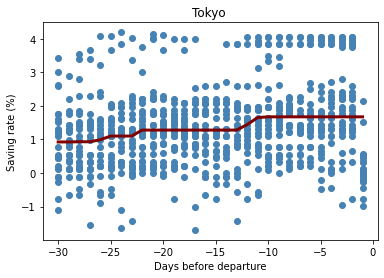

In [19]:
from sklearn.isotonic import IsotonicRegression

# classifier creation
iso_clf = IsotonicRegression(increasing = 'auto', y_min = math.floor(np.min(y)) , y_max = math.ceil(np.max(y)))

# train model & predict
iso_y_pred = iso_clf.fit_transform(x, y)

print("Isotonic Regression " + "-"*30)
print("param: \n{0}".format(iso_clf.get_params()))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
# plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(x, y, color = 'steelblue')
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Tokyo ")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

In [20]:
iso_clf.X_thresholds_, len(iso_clf.X_thresholds_)

(array([-30., -29., -28., -27., -26., -25., -23., -22., -13., -12., -11.,
        -10.,  -1.]),
 13)

In [21]:
iso_clf.y_thresholds_, len(iso_clf.y_thresholds_)

(array([0.92554525, 0.92554525, 0.93136099, 0.93136099, 0.9899381 ,
        1.10129181, 1.10129181, 1.27909399, 1.27909399, 1.44158748,
        1.65116886, 1.67369343, 1.67369343]),
 13)

Isotonic Regression


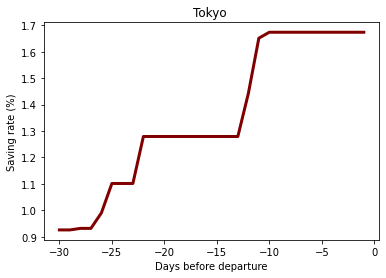

In [22]:
print("Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)
plt.title("Tokyo ")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

## Simplify

In [23]:
x_sim = [-30 ,-22 ,-13 ,-10 ,-1 ]
y_sim = [0.92554525 ,1.27909399 ,1.27909399 ,1.67369343 ,1.67369343]

Simplified Isotonic Regression


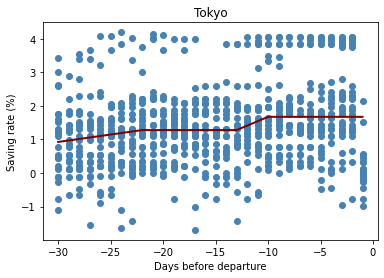

In [24]:
print("Simplified Isotonic Regression")

plt.scatter(x, y, color = 'steelblue')
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=2, label="Isotonic Simplify")

plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

Simplified Isotonic Regression


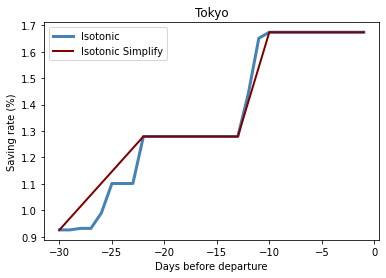

In [25]:
print("Simplified Isotonic Regression")

plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'steelblue', linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=2, label="Isotonic Simplify")

plt.title("Tokyo")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.legend()
plt.show()

## Equations

In [26]:
x_sim, y_sim

([-30, -22, -13, -10, -1],
 [0.92554525, 1.27909399, 1.27909399, 1.67369343, 1.67369343])

In [27]:
for i in range(0, len(x_sim)-1):
    print("-"*30, "\n", "{0}: x in [{1},{2}]".format(i+1, x_sim[i], x_sim[i+1]))
    # m = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    b1 = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    print('slope ', b1)

    b0 = get_intercept(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print('intercept ', b0)

    get_linear_equation(b0,b1)

------------------------------ 
 1: x in [-30,-22]
slope  0.044193592500000003
-30 0.92554525 -22 1.27909399 0.044193592500000003
intercept  2.2513530250000002
y = 2.25 + 0.04 *x
------------------------------ 
 2: x in [-22,-13]
slope  0.0
-22 1.27909399 -13 1.27909399 0.0
intercept  1.27909399
y = 1.28
------------------------------ 
 3: x in [-13,-10]
slope  0.13153314666666663
-13 1.27909399 -10 1.67369343 0.13153314666666663
intercept  2.989024896666666
y = 2.99 + 0.13 *x
------------------------------ 
 4: x in [-10,-1]
slope  0.0
-10 1.67369343 -1 1.67369343 0.0
intercept  1.67369343
y = 1.67


## MSE

In [28]:
def y_predict(x):
    y = 0
    if x >= -30 and x < -22:
        y = 2.25 + 0.04 *x
    elif x >= -22 and x < -13:
        y =  1.28
    elif x >= -13 and x < -10:
        y = 2.99 + 0.13 *x
    else:
        y = 1.67
    return y

Iso (simpliflied)------------------------------
Mean squared error: 1.30
Mean absolute error: 0.87
Coefficient of determination: 0.05


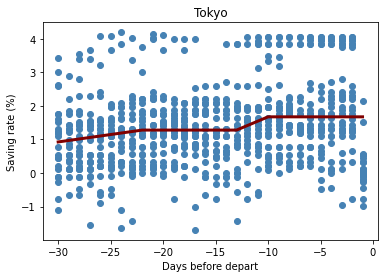

In [29]:
# predict using simpliflied isotonic
iso_y_pred = []
for i in x:
    iso_y_pred.append(y_predict(i))

print("Iso (simpliflied)" + "-"*30)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0


# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(x_sim, y_sim, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Tokyo")
plt.xlabel("Days before depart")
plt.ylabel("Saving rate (%)")

plt.show()

## Result

* Despite some trend change, the saving rate not change much < 6% absolute change rate
* non-decreasing period during -22 to -13, and -10 to -1
* the later buy the better